In [119]:
%matplotlib inline
data = np.genfromtxt('master_lock_signal.csv', delimiter=';',
                     skip_header=1, unpack=True)
x = data[0]
y1 = data[1]
y2 = data[2]

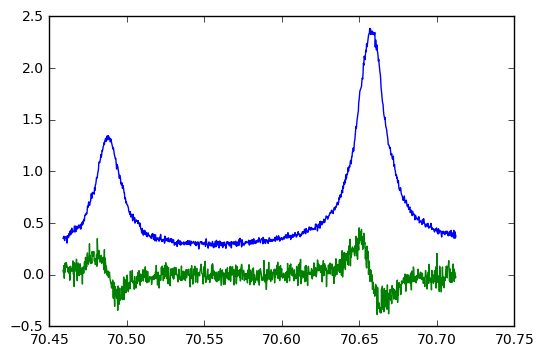

In [120]:
plot(x, y1)
plot(x, y2)

In [103]:
from scipy.optimize import curve_fit

def gaussian(x, a, x0, sigma, c):
    return a*exp(-(x-x0)**2/(2*sigma**2))+c

opt1,cov1 = curve_fit(gaussian, x[:300], y1[:300], p0=[1,70.48,.01,.5], maxfev=200000)
opt2,cov2 = curve_fit(gaussian, x[400:], y1[400:], p0=[2,70.68,0.01,.5], maxfev=200000)

onethreecross = opt1[1]
twothreecross = opt2[1]

# calculated relative to F'=3
freq_diff = (267e6 + 157e6)/2 - 267e6/2

scale = freq_diff / (twothreecross - onethreecross) # Hz / V
print("x scaling: %e Hz/V"%scale)
print("sigma: %e"%(opt2[2]*scale))

x scaling: 4.625781e+08 Hz/V
sigma: 4.816792e+06


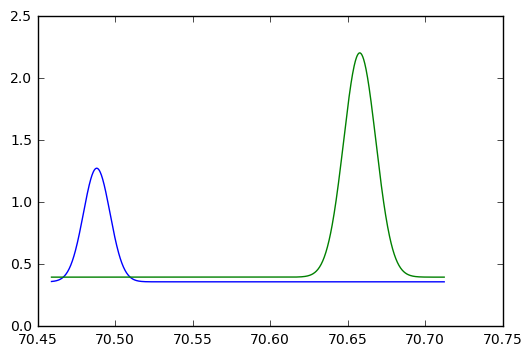

In [104]:
plot(x, gaussian(x, *opt1))
plot(x, gaussian(x, *opt2))

In [105]:
analysis_range = 0.005
idx = np.argwhere(np.logical_and(x - crossover > -analysis_range,
                                 x - crossover < analysis_range)).flatten()
a,c = np.polyfit(x[idx], y2[idx], 1)
print("slope: %e V/V"%a)
# a[V/V] * scale[Hz/V]
slope = a / scale
print("error translation: %e V/Hz"%slope)

slope: -6.462748e+01 V/V
error translation: -1.397115e-07 V/Hz


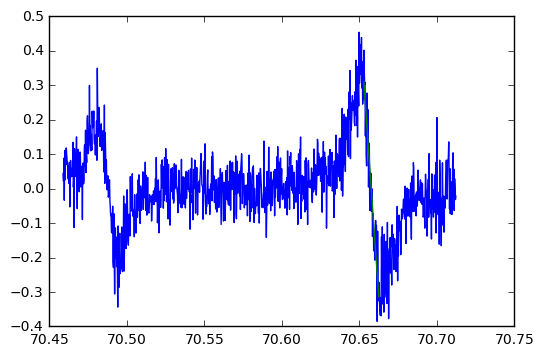

In [110]:
plot(x, y2)
plot(x[idx], np.poly1d((a,c))(x[idx]))

In [107]:
noise_data = np.genfromtxt('master_lock_signal_locked.csv', delimiter=';',
                           skip_header=1, unpack=True)

In [108]:
noise = (max(noise_data[2]) - min(noise_data[2])) / slope
print("noise pp: %e Hz"%abs(noise))

noise pp: 2.943129e+06 Hz


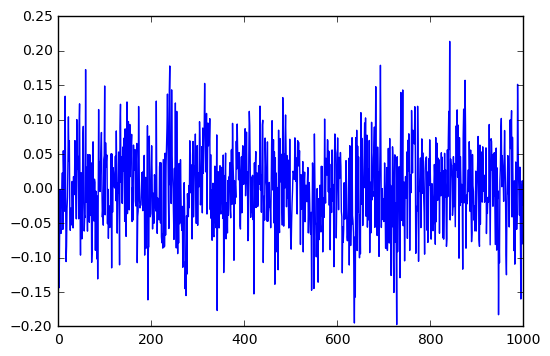

In [109]:
plot(noise_data[2])

<a list of 10 Patch objects>

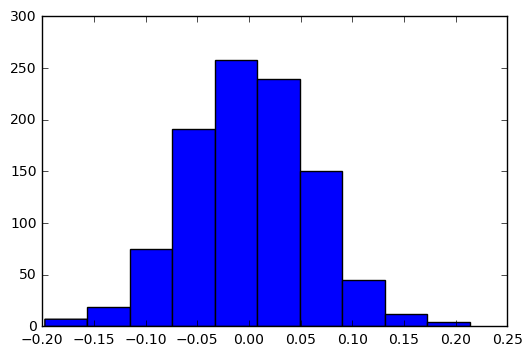

In [115]:
n, bins, patches = hist(noise_data[2])
patches